# Deteccion del Cancer de Mama en la ciudad de Winsconsin
* El siguiente analisis predictivo usaremos heramientas de Machine learning para lograr detectar el Cancer
  de mama en funcion de sus carateristicas

## 1.Planteamiento del problema
* Obteneer un modelo de machine learning para hallar el cancer de mama a temprana edad

## 2. Metricas de evaluacion
* Al tratarse de un problema de clasificacion (Tal y como cataloga el repositorio UCI) usaremos metricas como **accuracy** ,**f1**,**recall**,**precision**. La mas importante es **f1** ya que tiene mejor desenvolvimiento con los datos desbalanceados, y orientacion en la metrica de falsos positivos. 

## 3. Preparacion de datos
### 3.1 Preprocesamiento de datos

In [23]:
#cargamos los datos
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from pandas_profiling import ProfileReport


In [24]:

names=['Sample-code-number','Clump-Thickness','USize','UShape','Marginal-adhesion','SingleEpSize','BareNuclei','BlandCh','NormalNucleoi','Mitoses','Class']

In [25]:
data=pd.read_csv(r"https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data",names=names)

In [26]:
data.head()

,Sample-code-number,Clump-Thickness,USize,UShape,Marginal-adhesion,SingleEpSize,BareNuclei,BlandCh,NormalNucleoi,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [27]:
data.shape 

(699, 11)

In [28]:
data.describe() 

,Sample-code-number,Clump-Thickness,USize,UShape,Marginal-adhesion,SingleEpSize,BlandCh,NormalNucleoi,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [29]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Sample-code-number  699 non-null    int64 
 1   Clump-Thickness     699 non-null    int64 
 2   USize               699 non-null    int64 
 3   UShape              699 non-null    int64 
 4   Marginal-adhesion   699 non-null    int64 
 5   SingleEpSize        699 non-null    int64 
 6   BareNuclei          699 non-null    object
 7   BlandCh             699 non-null    int64 
 8   NormalNucleoi       699 non-null    int64 
 9   Mitoses             699 non-null    int64 
 10  Class               699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [30]:
#veamos si hay nulos
data.isnull().sum()

Sample-code-number    0
Clump-Thickness       0
USize                 0
UShape                0
Marginal-adhesion     0
SingleEpSize          0
BareNuclei            0
BlandCh               0
NormalNucleoi         0
Mitoses               0
Class                 0
dtype: int64

In [31]:
#por suerte no hay nulos.
#pero detectaos que '?' es detectado como nulo
data.replace('?',np.nan,inplace=True)
#Entonces tenemosque ir a la exploracion de datos

In [32]:
data.isnull().sum() 

Sample-code-number     0
Clump-Thickness        0
USize                  0
UShape                 0
Marginal-adhesion      0
SingleEpSize           0
BareNuclei            16
BlandCh                0
NormalNucleoi          0
Mitoses                0
Class                  0
dtype: int64

In [33]:
#como son discretas lo remplazaremos por la moda, el valor mas frecuente
moda=data['BareNuclei'].mode()[0]
data['BareNuclei']=data['BareNuclei'].replace(np.nan,moda)

#y verificamos su asignacion
data.isnull().sum() 

Sample-code-number    0
Clump-Thickness       0
USize                 0
UShape                0
Marginal-adhesion     0
SingleEpSize          0
BareNuclei            0
BlandCh               0
NormalNucleoi         0
Mitoses               0
Class                 0
dtype: int64

In [34]:
data.duplicated().sum()

9

In [22]:
len(data['Sample-code-number'].unique())

645

In [35]:
#La prescencia de valores duplicados se realiza en la exploracion de datos como luego de la seleccion de caracteriticas : Ojo. Importante
data.drop_duplicates(inplace=True) 

In [37]:
#una vez borrado los elementos redundantes
#debido a que nos nos muestra el codigo del numero de muestra 'Sample-code-number'

1182404    6
1276091    5
1238777    2
734111     2
385103     2
          ..
1172152    1
558538     1
1207986    1
1302428    1
625201     1
Name: Sample-code-number, Length: 645, dtype: int64

In [36]:
data.shape 

(690, 11)

### 3.2 Exploracion de datos

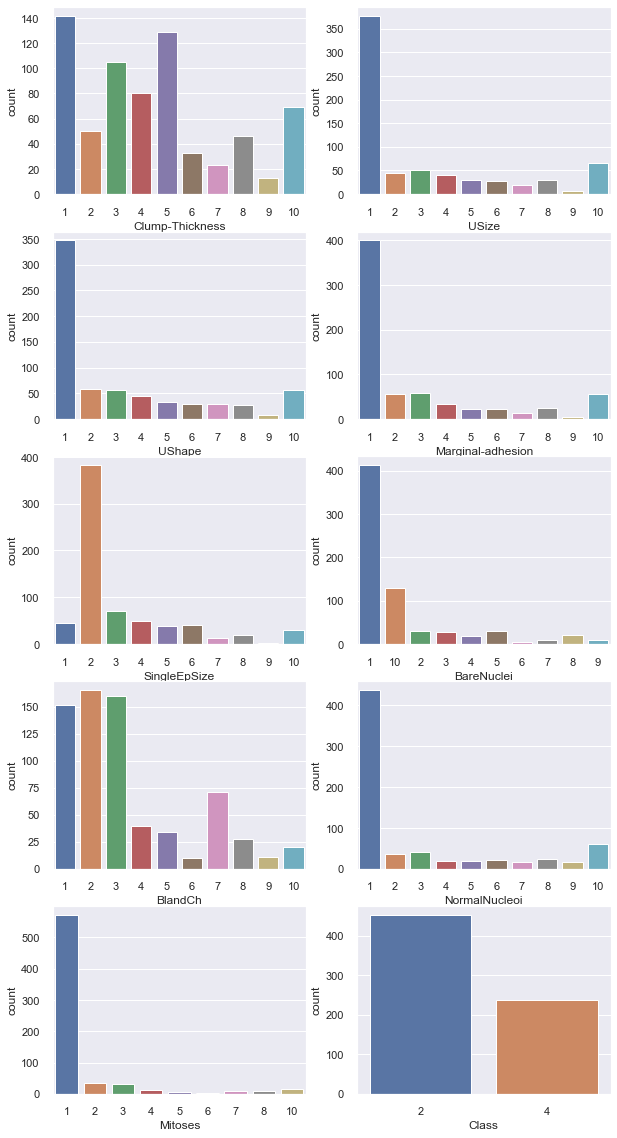

In [38]:
#1re enfoque: Hacerlo todo manual y deectar valor atipicos
#podemos apreciar el ID qu no guarda relacion con nada, pero lo dejaremos para la Feature_selection
#como los valores hacen referencia a grados, 

fig,axes=plt.subplots(5,2,figsize=(10,20 ))
for ax,column in zip(axes.flat,data.columns[1:]):
    sns.countplot(data[column],ax=ax)


#2doEnfoque: Usar pandas-profiling (Libreria que hace el analisis de forma automatica)

In [39]:
#ya habiendo analizado las clases, verificaremos las categorias de target
data['Class'].unique() 

array([2, 4], dtype=int64)

In [40]:
data['Class'].value_counts()

2    452
4    238
Name: Class, dtype: int64

In [41]:
#usariamos las metricas mas conocidas, como media, e incluso analisi de outliers. Pero observamos muchas variables discretas y no continuas
result={'Mediana':list(),
        'Moda':list()}
for column in data.columns[1:]:
    result['Mediana'].append(data[column].median())
    result['Moda'].append(data[column].mode()[0])
    
pd.DataFrame(result,index=data.columns[1:])

,Mediana,Moda
Clump-Thickness,4.0,1
USize,1.0,1
UShape,1.0,1
Marginal-adhesion,1.0,1
SingleEpSize,2.0,2
BareNuclei,1.0,1
BlandCh,3.0,2
NormalNucleoi,1.0,1
Mitoses,1.0,1
Class,2.0,2


### 3.3 Seleccion de caracteristicas
* Al tratarse de un problema de clasificacion con entradas numericas y salidas categoricas
usaremos ANOVA reflejado en f_classif

In [42]:

data['BareNuclei']=data['BareNuclei'].astype('int64') 

In [43]:
#eliminaremos los registros duplicados. Ojo si en el problema se tratn Series temporales, no se debe elimnar registros identicos
#porue afectaria al modelo, En este caso no hay relacion alguna con el tiempo
data.duplicated().sum()  

0

In [51]:
#data.drop_duplicates(inplace=True)
data=data.drop('Sample-code-number',axis=1)

In [52]:
#Transformamos las salidas categoricas 4 (maligno) a 0 y 2(Benigno) a 0) de esta manera preservamos la codificacion categorica
data=data.replace({4:1,2:0})

In [53]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690 entries, 0 to 698
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Clump-Thickness    690 non-null    int64
 1   USize              690 non-null    int64
 2   UShape             690 non-null    int64
 3   Marginal-adhesion  690 non-null    int64
 4   SingleEpSize       690 non-null    int64
 5   BareNuclei         690 non-null    int64
 6   BlandCh            690 non-null    int64
 7   NormalNucleoi      690 non-null    int64
 8   Mitoses            690 non-null    int64
 9   Class              690 non-null    int64
dtypes: int64(10)
memory usage: 79.3 KB


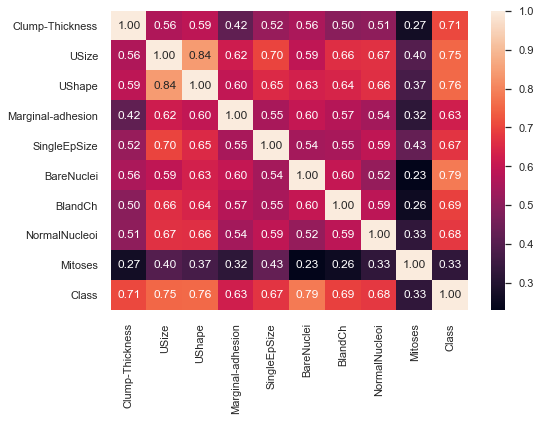

In [54]:
#veamos la correlacion de variables que funciona con variables numericas y en el caso de la regression
corr=data.corr(method='pearson')

#os resultados seran erroneos debido que no se ha hecho la seleccion adeuada para el tipo de problema adecuada
#Entradas numericas- salidas categoricas--> Problema de clasificacion: Se usara el coeficiente de correlacion de ANOVA **f_classif**
sns.heatmap(corr,annot=True,fmt='0.2f')

* podemos observar que los resultados seerian alentadores si en verdad se tratara de una regression. Por lo que las usaremos la seleccion de caracteristicas adecuadas

In [55]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [56]:
def feature_select(X,y,func=None,n='all'):
    fs=SelectKBest(score_func=func,k=n)
    fs.fit(X,y)
    columns=data.columns[:-1] 
    plt.bar(np.arange(len(columns)),fs.scores_)
    plt.xticks(np.arange(len(columns)),columns)
    plt.xlabel('Columnas')
    plt.ylabel('Score')
    return fs #retornamos el seleccionador de entidades

In [57]:
def drop_duplicated(X,y):
    #concatenamos los datos para poder identificar duplicados a nivel DataFrame
    data=pd.concat(pd.DataFrame(X),pd.DataFrame(y[:,np.newaxis]),axis=1)
    print('Rows duplicated: {0}'.format(data.duplicated().sum()))
    data.drop_duplicates(inplace=True)
    #retornamos los datos sin duplicados
    #return data.iloc[:,:-1].values,data.iloc[:,-1].values

In [58]:
#obtenemos los datos
X=data.drop('Class',axis=1).values
y=data['Class'].values

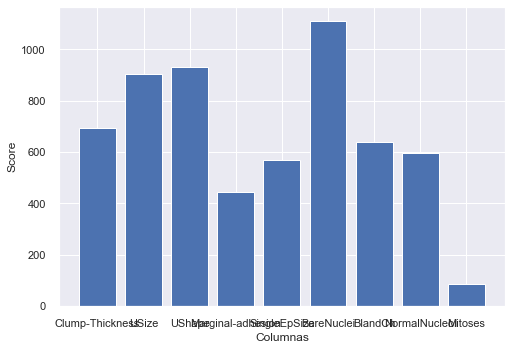

In [59]:
fs=feature_select(X,y,func=f_classif,n='all')

In [60]:
fs.scores_ 

array([ 692.03686626,  903.86091471,  931.69646715,  444.63808816,
        567.66778993, 1110.55952446,  638.35457582,  594.56207142,
         83.65208059])

* Los resultados son muy alentadores, puesto que incluso el valor mas bajo (Puntaje para 'Mitoses') tiene una relacion significativa con la variable de salida

In [61]:
#veamos que pasa cuando separamos los datos antes
from sklearn.model_selection  import train_test_split
Xtrain,Xtest,Ytrain,Ytest= train_test_split(X,y,random_state=0,test_size=0.2,stratify=y)

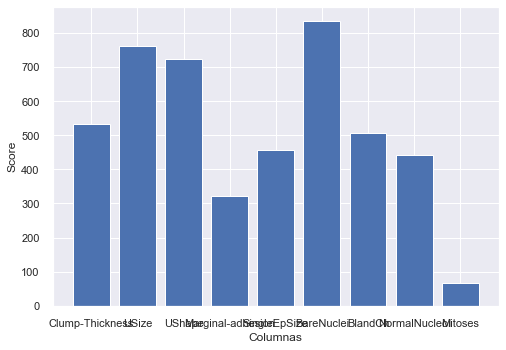

In [62]:
fs=feature_select(Xtrain,Ytrain,func=f_classif,n=8)

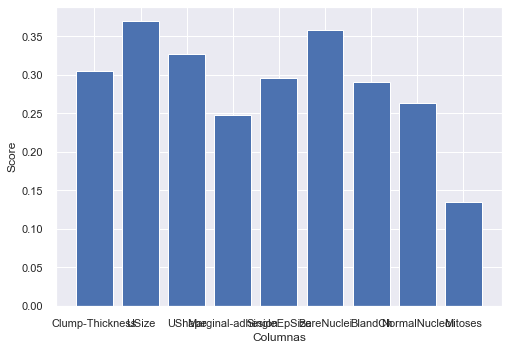

In [63]:
from sklearn.feature_selection import mutual_info_classif
fs_mutual= feature_select(Xtrain,Ytrain,func=mutual_info_classif,n='all')

In [64]:
fs.scores_

array([533.31599177, 761.30845246, 722.63425743, 322.87668131,
       455.51000484, 834.82942892, 507.13106619, 441.77958374,
        66.23576012])

In [65]:

#puntaj para ganancia mutua de informacion
fs_mutual.scores_ 

array([0.30502817, 0.37003614, 0.32700028, 0.24782564, 0.29665966,
       0.35870541, 0.29047117, 0.26358896, 0.13450756])

In [66]:
#podemos ver claramente que ahora 'mitoses' es menos relevante, la dejaremos asi, para luego evaluar el rendimiento del modelo
# y si hay sobreajuste o subajuste ya tendremos a la caracteristica candidata para la eliminacion
#unas horas despues....... Verificaremos los datos
#eliminamos 'Mitoses' de los datos
data=data.drop('Mitoses',axis=1)

In [73]:
X=fs.transform(X)
Xtrain=fs.transform(Xtrain)
Xtest=fs.transform(Xtest)

### 3.4 Transformacion de datos

Una vez elejido las mejoras carateristicas se procede a:
* Codificar las Variables de entrada seleccionadas (Si existen dummies). Ojo: La variable de salida al ser categorica ya fue transformada en el proceso de seleccion de caracteristicas y en  mi opinion codificarla para hacer las prueebas correspondientes es una buena practica que suelo hacer a menudo.
* Escalar variables 

In [31]:
#Antes solia hacer el escalado, pero es mejor hacerlo con Pipelines, en el que los escalo antes de entrenarlos

### Seleccion del modelo

* Haremos un Test con el mejor modelo sobre todos los datos, comparandolos de forma equitativa

### 3.1 Elejir el mejor modelo

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBoostClassifier
from sklearn.svm import SVC

from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import StandardScaler

In [75]:
names_model=['Logistic','DecisionTree','RandomForest','SupportVector']
list_model=[LogisticRegression(solver='lbfgs',class_weight='balanced'),
            DecisionTreeClassifier(class_weight='balanced'),
            RandomForestClassifier(class_weight='balanced'),
            #XGBoostClassifier(),
            SVC(class_weight='balanced')
           ]


In [76]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
#la seleccion del modelo se hace con todos los datos, tanto de entrenamiento como de Prueba
kfold=StratifiedKFold(n_splits=10,random_state=42,shuffle=True)

In [79]:
score_accuracy={
    'Train':[],
    'Test':[]
}
score_f1={
    'Train':[],
    'Test':[]
}

for name,model in zip(names_model,list_model):
    pipe_model=make_pipeline(StandardScaler(),model)
    
    scores=cross_validate(pipe_model,X ,y,
                          cv=kfold,
                          scoring=('accuracy','f1'),
                          n_jobs=-1,
                          return_train_score=True,
                         )
    result=pd.DataFrame(scores)
    df=pd.concat([result.mean(axis=0),result.std(axis=0)],axis=1)
    df
#construimos el frame
accur=pd.DataFrame(score_accuracy,index=names_model)
f1=pd.DataFrame(score_f1,index=names_model)


ValueError: Empty data passed with indices specified.

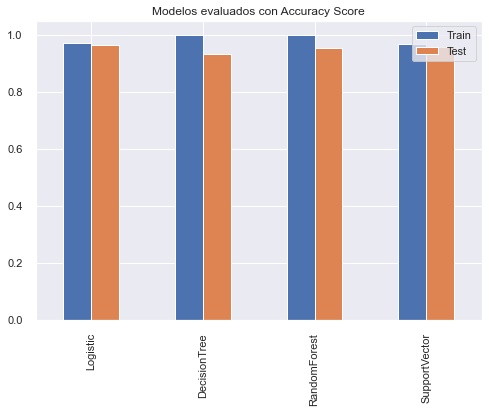

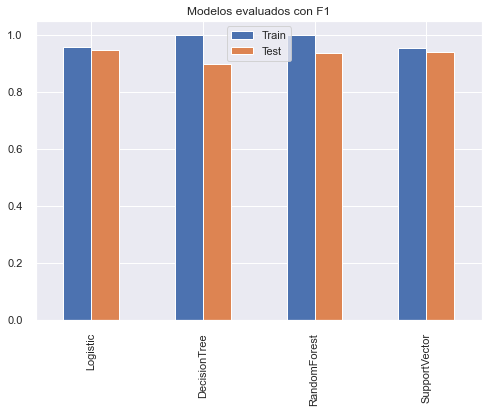

In [78]:
accur.plot(kind='bar',title='Modelos evaluados con Accuracy Score')
f1.plot(kind='bar',title='Modelos evaluados con F1')

* De los graficos anteriores podemos deducir que por cada metrica y conjunto de datos independiente. Tenemos un margen de sobreajuste a los datos .

* La razon por la que elejimos la metrica **'F1'** es porque es maz veraz en los resultados que **'accuracy'**, es porque nuestro conjunto de datos presenta datos desbalanceados.
* Entonces tomando en cuenta el mejor puntaje en la **F1**,( sin dejar de lado el **accuracy**), la mejor puntuacion la posee **Logistic Regression**, seguido de **Support Vector Classifier**

### 3.2 Ajustar el modelo
* Esta parte consta de ajustar los hiperparametros del modelo
* Validaciones cruzadas para el conjunto de Train y Validacion (Implicita)
* El conjunto de Testeo debe estar excluido de los resltado de entrenamiento

In [80]:
from sklearn.pipeline import Pipeline 
model=Pipeline(steps=[
    ('scaler',StandardScaler()),
    ('logistic',LogisticRegression(class_weight='balanced'))
])

In [81]:
#ahora veamos el comportamiento del modelo en el conjunto de entrenamiento que es el que se utilizara de apartir en adelante

scores=cross_validate(model,Xtrain,Ytrain,
                          cv=kfold,
                          scoring=('accuracy','f1'),
                          n_jobs=-1,
                          return_train_score=True,
                         )

In [82]:
score_mean=pd.DataFrame(scores).mean(axis=0)
score_std=pd.DataFrame(scores).std(axis=0)
pd.concat([score_mean,score_std],axis=1,keys=['Mean','Std'])

,Mean,Std
fit_time,0.043433,0.015040
score_time,0.013177,0.009101
test_accuracy,0.963734,0.022707
train_accuracy,0.967191,0.002123
test_f1,0.947539,0.033429
train_f1,0.952716,0.003009


In [83]:
model.fit(Xtrain,Ytrain);

### 3.3 Validacion del modelo final
* A esta fase se llega solo si se logra obtener un equilibrio entre el sobreajuste ysubajuste de datos

In [84]:
Ypred=model.predict(Xtest)

In [85]:
from sklearn.metrics import classification_report

In [86]:
print(classification_report(Ytest,Ypred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        90
           1       0.98      0.94      0.96        48

    accuracy                           0.97       138
   macro avg       0.97      0.96      0.97       138
weighted avg       0.97      0.97      0.97       138



In [87]:
from sklearn.metrics import confusion_matrix

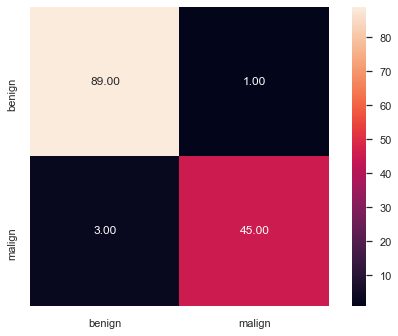

In [88]:
labels=['benign','malign']
conf=confusion_matrix(Ytest,Ypred)
sns.heatmap(conf,annot=True,fmt='.2f',xticklabels=labels,yticklabels=labels,square=True,)

In [47]:
#est es increible podemos notar resultados muy prometedores para la solucion de nuestro problema. 
#Ya existe un equilibrio entre sesgo y varianza. ...Pero nos damos cuenta de algo. Los valores duplicados en el datset
#por lo tanto procedemos a guardar el modelo
import joblib


In [48]:
#joblib.dump(model,'breast_cancerDetector_logisticV0.1.pkl')

In [49]:
#mañana continuamos con la implementacion del mejor modelo, puesto que echamos de menos los duplicacdos
#con la elimnacion de los duplicados obtuvimos datos mas sinceros debidoa que a la precesnia de duplicados cierta proporcion se destinaba
#al los datos de entreamiento y a otra a la de Test, lo que impedi un poco al enfrentarse a datos reales